In [68]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

## Reading the file

In [69]:
df = pd.read_csv("Banking_CreditCardAttrition (1).csv")
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Trans_Amt_Dec12,Trans_Amt_Jan13,Trans_Amt_Feb13,Trans_Amt_Mar13,Trans_Count_Oct12,Trans_Count_Nov12,Trans_Count_Dec12,Trans_Count_Jan13,Trans_Count_Feb13,Trans_Count_Mar13
0,768805383,0,45.0,M,3,High School,Married,$60K - $80K,Blue,39,...,253,196,196,262,0,7,9,12,7,7
1,818770008,0,49.0,F,5,Graduate,Single,Less than $40K,Blue,44,...,242,323,222,238,0,1,6,11,7,8
2,713982108,0,51.0,M,3,Graduate,Married,$80K - $120K,Blue,36,...,330,967,213,182,0,1,5,5,4,5
3,769911858,0,40.0,F,4,High School,Unknown,Less than $40K,Blue,34,...,166,184,285,215,0,4,2,5,2,7
4,709106358,0,40.0,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,149,192,88,279,0,1,7,9,5,6


In [70]:
df ['Total_TransAmount'] = df[['Trans_Amt_Oct12','Trans_Amt_Nov12','Trans_Amt_Dec12','Trans_Amt_Jan13','Trans_Amt_Feb13','Trans_Amt_Mar13']].sum(axis=1)
df['Total_TransCount'] = df[['Trans_Count_Oct12','Trans_Count_Nov12','Trans_Count_Dec12','Trans_Count_Jan13','Trans_Count_Feb13','Trans_Count_Mar13']].sum(axis=1)


In [71]:
df = df.drop(['Trans_Amt_Oct12','Trans_Amt_Nov12','Trans_Amt_Dec12','Trans_Amt_Jan13','Trans_Amt_Feb13','Trans_Amt_Mar13'
              ,'Trans_Count_Oct12','Trans_Count_Nov12','Trans_Count_Dec12','Trans_Count_Jan13',
              'Trans_Count_Feb13','Trans_Count_Mar13'], axis = 1)
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_TransAmount,Total_TransCount
0,768805383,0,45.0,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,1144,42
1,818770008,0,49.0,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,1291,33
2,713982108,0,51.0,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,1887,20
3,769911858,0,40.0,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2661,1171,20
4,709106358,0,40.0,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,816,28


## Data Analysis

In [72]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  int64  
 2   Customer_Age              10113 non-null  float64
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10123 non-null  float64
 14  Total_

,CLIENTNUM,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_TransAmount,Total_TransCount
count,1.012700e+04,10127.000000,10113.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10123.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,0.160660,46.326412,2.346203,35.928409,3.812580,2.341167,2.455317,9404.071817,1194.058951,4404.086304,64.858695
std,3.690378e+07,0.367235,8.022353,1.298908,7.986416,1.554408,1.010622,1.106225,12283.599656,1073.368778,3397.129254,23.472570
min,7.080821e+08,0.000000,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,398.000000,0.000000,510.000000,10.000000
25%,7.130368e+08,0.000000,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,2155.500000,45.000000
50%,7.179264e+08,0.000000,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3899.000000,67.000000
75%,7.731435e+08,0.000000,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11072.500000,1784.000000,4741.000000,81.000000
max,8.283431e+08,1.000000,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,180000.000000,40345.000000,18484.000000,139.000000


**Checking for null values**

In [73]:
df.isnull().sum()

CLIENTNUM                    0
Attrition_Flag               0
Customer_Age                14
Gender                       0
Dependent_count              0
Education_Level              0
Marital_Status               0
Income_Category              0
Card_Category                0
Months_on_book               0
Total_Relationship_Count     0
Months_Inactive_12_mon       0
Contacts_Count_12_mon        0
Credit_Limit                 4
Total_Revolving_Bal          0
Total_TransAmount            0
Total_TransCount             0
dtype: int64

In [74]:
df = df.dropna(axis=0, how='any')

In [75]:
df.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Total_TransAmount           0
Total_TransCount            0
dtype: int64

No. of Flag-0 customers:  8484
No. of Flag-1 customers:  1625


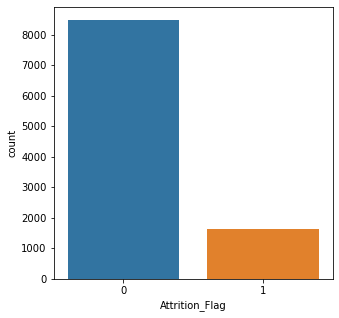

In [76]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='Attrition_Flag', data=df)
x, y = df.Attrition_Flag.value_counts()
print("No. of Flag-0 customers: ", x)
print("No. of Flag-1 customers: ", y)

<AxesSubplot:xlabel='Education_Level', ylabel='count'>

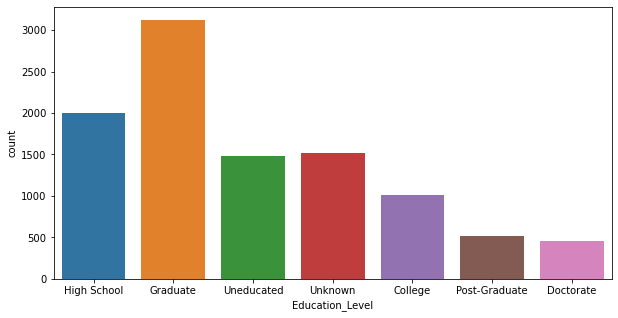

In [77]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'Education_Level', data= df)

<AxesSubplot:xlabel='Education_Level', ylabel='count'>

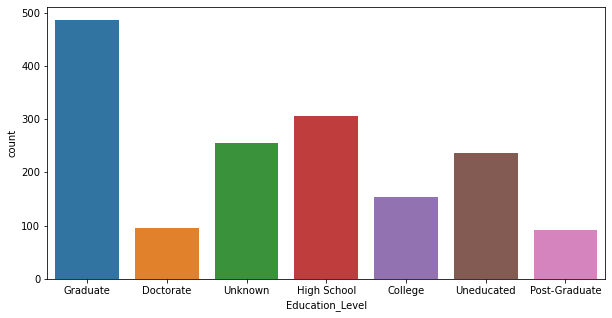

In [78]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'Education_Level', data = df[df['Attrition_Flag']==1])

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, '$60K - $80K'),
  Text(1, 0, 'Less than $40K'),
  Text(2, 0, '$80K - $120K'),
  Text(3, 0, '$40K - $60K'),
  Text(4, 0, '$120K +'),
  Text(5, 0, 'Unknown')])

<Figure size 720x1440 with 0 Axes>

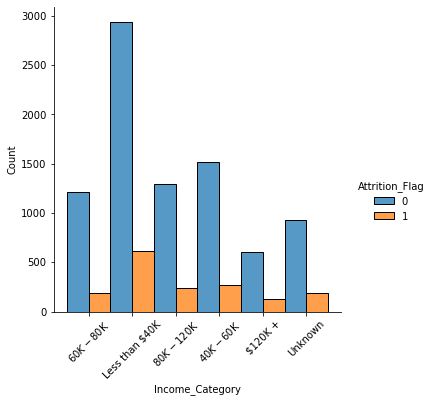

In [79]:
plt.figure(figsize=(10,20))
sns.displot(x = df.Income_Category, hue = df.Attrition_Flag, multiple="dodge")
plt.xticks(rotation='45')

We can infer that people with income less than 40k tend to attrition more 

Text(0.5, 1.0, 'Attrition customers')

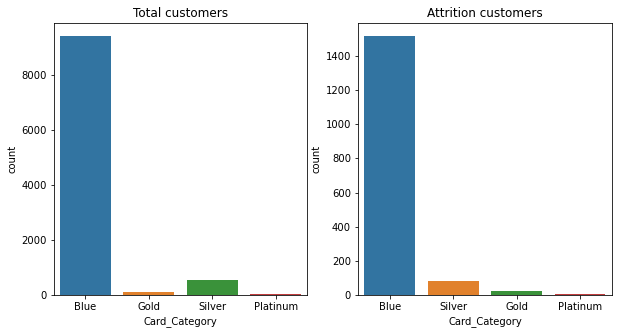

In [119]:
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.countplot(x = 'Card_Category', data = df)
plt.title('Total customers')
plt.subplot(122)
sns.countplot(x = 'Card_Category', data = df[df['Attrition_Flag']==1])
plt.title('Attrition customers')

This information seems to be less helpful as the number of attritions corresponds to the total number of card holder in that category. So, it is highly unlikely that we would get useful information to predict the outcome with this data

In [121]:
df.duplicated().sum()

0

## Check outliers in data

In [81]:
def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    sns.boxplot(x = ys.index, data=ys)

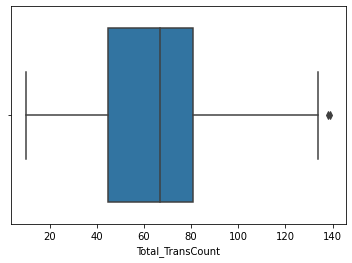

In [92]:
outliers_iqr(df['Total_TransCount'])

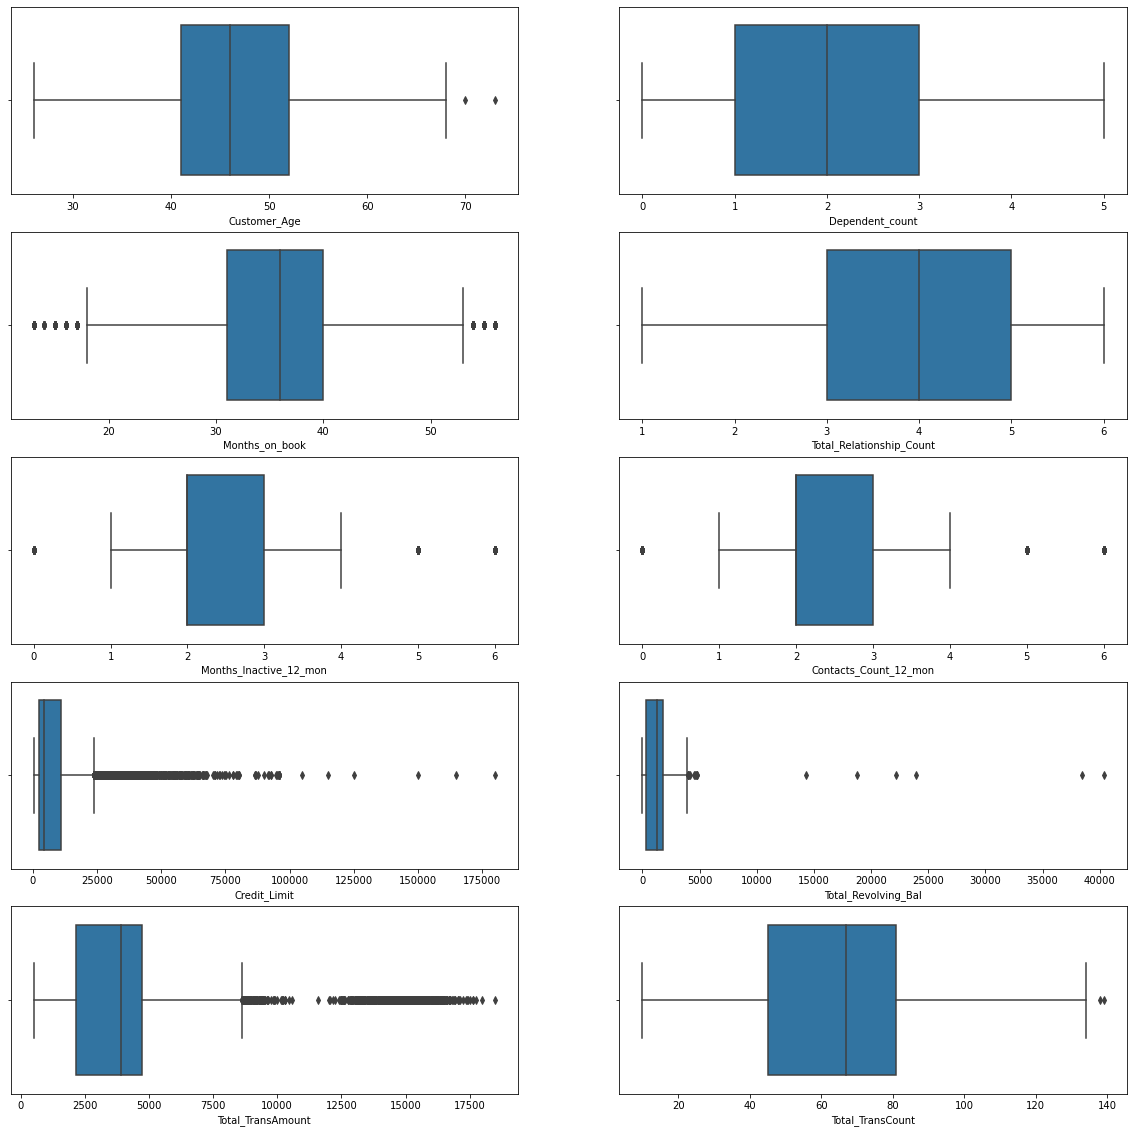

In [122]:
plt.figure(figsize=(20,20))
plt.subplot(5,2,1)
outliers_iqr(df['Customer_Age'])
plt.subplot(5,2,2)
outliers_iqr(df['Dependent_count'])
plt.subplot(5,2,3)
outliers_iqr(df['Months_on_book'])
plt.subplot(5,2,4)
outliers_iqr(df['Total_Relationship_Count'])
plt.subplot(5,2,5)
outliers_iqr(df['Months_Inactive_12_mon'])
plt.subplot(5,2,6)
outliers_iqr(df['Contacts_Count_12_mon'])
plt.subplot(5,2,7)
outliers_iqr(df['Credit_Limit'])
plt.subplot(5,2,8)
outliers_iqr(df['Total_Revolving_Bal'])
plt.subplot(5,2,9)
outliers_iqr(df['Total_TransAmount'])
plt.subplot(5,2,10)
outliers_iqr(df['Total_TransCount'])
plt.savefig("Box")

In [84]:
cols = ['Customer_Age','Dependent_count','Months_on_book','Total_Relationship_Count','Months_Inactive_12_mon'
        ,'Contacts_Count_12_mon','Credit_Limit','Total_Revolving_Bal']

## Treating outliers

In [85]:
def fill_outliers(a):
    floor = a.quantile(0.05)
    cap = a.quantile(0.99)
    a.fillna(cap)
    a.fillna(floor)

In [97]:
fill_outliers(df.Months_on_book)
fill_outliers(df.Months_Inactive_12_mon)
fill_outliers(df.Contacts_Count_12_mon)
fill_outliers(df.Credit_Limit)
fill_outliers(df.Total_TransAmount)
fill_outliers(df.Total_TransCount)

## Checking Multi-collinearity

In [87]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def Calc_vif (data):
    vif = pd.DataFrame()
    vif['features'] = data.columns
    vif['VIF_value'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return (vif)

In [98]:
features = df[['Customer_Age','Dependent_count','Months_on_book'
              ,'Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon'
              ,'Credit_Limit','Total_Revolving_Bal','Total_TransAmount','Total_TransCount']]
features

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_TransAmount,Total_TransCount
0,45.0,3,39,5,1,3,12691.0,777,1144,42
1,49.0,5,44,6,1,2,8256.0,864,1291,33
2,51.0,3,36,4,1,0,3418.0,0,1887,20
3,40.0,4,34,3,4,1,3313.0,2661,1171,20
4,40.0,3,21,5,1,0,4716.0,0,816,28
...,...,...,...,...,...,...,...,...,...,...
10122,50.0,2,40,3,2,3,4003.0,1851,15476,117
10123,41.0,2,25,4,2,3,4277.0,2186,8764,69
10124,44.0,1,36,5,3,4,5409.0,0,10291,60
10125,30.0,2,36,4,3,3,5281.0,0,8395,62


In [99]:
Calc_vif(features)

,features,VIF_value
0,Customer_Age,72.215788
1,Dependent_count,4.006333
2,Months_on_book,56.485747
3,Total_Relationship_Count,7.050158
4,Months_Inactive_12_mon,6.033855
5,Contacts_Count_12_mon,5.462559
6,Credit_Limit,1.651442
7,Total_Revolving_Bal,2.208895
8,Total_TransAmount,8.447944
9,Total_TransCount,22.017528


In [100]:
df.corr()

,CLIENTNUM,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_TransAmount,Total_TransCount
CLIENTNUM,1.000000,-0.046610,0.007760,0.007114,0.135182,0.006489,0.005907,0.005478,0.003752,-0.009060,-0.019145,-0.002275
Attrition_Flag,-0.046610,1.000000,0.018087,0.018316,0.013765,-0.150992,0.152564,0.204165,-0.014875,-0.154720,-0.168407,-0.371220
Customer_Age,0.007760,0.018087,1.000000,-0.122265,0.789387,-0.011184,0.054413,-0.019007,0.005686,0.007567,-0.046118,-0.066978
Dependent_count,0.007114,0.018316,-0.122265,1.000000,-0.103020,-0.039371,-0.010826,-0.040162,0.068671,0.002029,0.024996,0.050126
Months_on_book,0.135182,0.013765,0.789387,-0.103020,1.000000,-0.008647,0.073993,-0.011441,0.008208,-0.000364,-0.038920,-0.049989
Total_Relationship_Count,0.006489,-0.150992,-0.011184,-0.039371,-0.008647,1.000000,-0.003398,0.055173,-0.074947,0.005921,-0.347134,-0.241657
Months_Inactive_12_mon,0.005907,0.152564,0.054413,-0.010826,0.073993,-0.003398,1.000000,0.029542,-0.017529,-0.039523,-0.036845,-0.042664
Contacts_Count_12_mon,0.005478,0.204165,-0.019007,-0.040162,-0.011441,0.055173,0.029542,1.000000,0.014511,-0.034585,-0.112628,-0.151849
Credit_Limit,0.003752,-0.014875,0.005686,0.068671,0.008208,-0.074947,-0.017529,0.014511,1.000000,0.030844,0.170279,0.085853
Total_Revolving_Bal,-0.009060,-0.154720,0.007567,0.002029,-0.000364,0.005921,-0.039523,-0.034585,0.030844,1.000000,0.038685,0.020611


In [101]:
features = features.drop(['Months_on_book'], axis =1)
features

,Customer_Age,Dependent_count,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_TransAmount,Total_TransCount
0,45.0,3,5,1,3,12691.0,777,1144,42
1,49.0,5,6,1,2,8256.0,864,1291,33
2,51.0,3,4,1,0,3418.0,0,1887,20
3,40.0,4,3,4,1,3313.0,2661,1171,20
4,40.0,3,5,1,0,4716.0,0,816,28
...,...,...,...,...,...,...,...,...,...
10122,50.0,2,3,2,3,4003.0,1851,15476,117
10123,41.0,2,4,2,3,4277.0,2186,8764,69
10124,44.0,1,5,3,4,5409.0,0,10291,60
10125,30.0,2,4,3,3,5281.0,0,8395,62


In [102]:
Calc_vif(features)

,features,VIF_value
0,Customer_Age,17.185815
1,Dependent_count,4.004760
2,Total_Relationship_Count,7.049243
3,Months_Inactive_12_mon,6.021329
4,Contacts_Count_12_mon,5.462480
5,Credit_Limit,1.651333
6,Total_Revolving_Bal,2.208608
7,Total_TransAmount,8.446705
8,Total_TransCount,22.016354


In [103]:
features = features.drop(['Customer_Age'], axis =1)
features

,Dependent_count,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_TransAmount,Total_TransCount
0,3,5,1,3,12691.0,777,1144,42
1,5,6,1,2,8256.0,864,1291,33
2,3,4,1,0,3418.0,0,1887,20
3,4,3,4,1,3313.0,2661,1171,20
4,3,5,1,0,4716.0,0,816,28
...,...,...,...,...,...,...,...,...
10122,2,3,2,3,4003.0,1851,15476,117
10123,2,4,2,3,4277.0,2186,8764,69
10124,1,5,3,4,5409.0,0,10291,60
10125,2,4,3,3,5281.0,0,8395,62


In [104]:
Calc_vif(features)

,features,VIF_value
0,Dependent_count,3.940009
1,Total_Relationship_Count,6.224913
2,Months_Inactive_12_mon,5.343063
3,Contacts_Count_12_mon,4.969103
4,Credit_Limit,1.637972
5,Total_Revolving_Bal,2.159292
6,Total_TransAmount,8.356371
7,Total_TransCount,19.435011


In [105]:
features = features.drop(['Total_TransCount'], axis =1)
features

,Dependent_count,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_TransAmount
0,3,5,1,3,12691.0,777,1144
1,5,6,1,2,8256.0,864,1291
2,3,4,1,0,3418.0,0,1887
3,4,3,4,1,3313.0,2661,1171
4,3,5,1,0,4716.0,0,816
...,...,...,...,...,...,...,...
10122,2,3,2,3,4003.0,1851,15476
10123,2,4,2,3,4277.0,2186,8764
10124,1,5,3,4,5409.0,0,10291
10125,2,4,3,3,5281.0,0,8395


In [106]:
Calc_vif(features)

,features,VIF_value
0,Dependent_count,3.720576
1,Total_Relationship_Count,5.251423
2,Months_Inactive_12_mon,5.079705
3,Contacts_Count_12_mon,4.873751
4,Credit_Limit,1.635193
5,Total_Revolving_Bal,2.142849
6,Total_TransAmount,2.505528


In [114]:
df2 = df[['Attrition_Flag','Dependent_count','Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon','Credit_Limit','Total_Revolving_Bal']]
df2

,Attrition_Flag,Dependent_count,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal
0,0,3,5,1,3,12691.0,777
1,0,5,6,1,2,8256.0,864
2,0,3,4,1,0,3418.0,0
3,0,4,3,4,1,3313.0,2661
4,0,3,5,1,0,4716.0,0
...,...,...,...,...,...,...,...
10122,0,2,3,2,3,4003.0,1851
10123,1,2,4,2,3,4277.0,2186
10124,1,1,5,3,4,5409.0,0
10125,1,2,4,3,3,5281.0,0


## Logistic Regression

In [115]:
from sklearn.model_selection import train_test_split
Y = df2['Attrition_Flag']
X = df2.drop(['Attrition_Flag'], axis =1)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [116]:
from  sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=100, random_state=0)
model.fit(X_train, Y_train)


LogisticRegression(random_state=0)

In [117]:
from sklearn.metrics import accuracy_score

predictions = model.predict(X_test)
accuracy_score(Y_test, predictions)

0.8625123639960435